> # PART ONE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
def get_points(data  ,  k):
    #return k-random points of the data dataframe 
    #these points are the initial centroids
    return data.sample(k)

In [3]:
def dist(data,Points):
    k = len(Points)
    #calculating the distance between each feature and the point
    #for k == 3 we have 3 distances as k is the number of cluster or centroids
    #for k == 5 we have 5 distances as k is the number of cluster or centroids
    if k == 3:
        data['dist1'] = abs(data['Height']-Points.iloc[0][0])+abs(data['Weight']-Points.iloc[0][1])+abs(data['BMI']-Points.iloc[0][2])+abs(data['Shoulders']-Points.iloc[0][3])+abs(data['Arms']-Points.iloc[0][4])
        data['dist2'] = abs(data['Height']-Points.iloc[1][0])+abs(data['Weight']-Points.iloc[1][1])+abs(data['BMI']-Points.iloc[1][2])+abs(data['Shoulders']-Points.iloc[1][3])+abs(data['Arms']-Points.iloc[1][4])
        data['dist3'] = abs(data['Height']-Points.iloc[2][0])+abs(data['Weight']-Points.iloc[2][1])+abs(data['BMI']-Points.iloc[2][2])+abs(data['Shoulders']-Points.iloc[2][3])+abs(data['Arms']-Points.iloc[2][4])
    elif k == 5:
        data['dist1'] = abs(data['Height']-Points.iloc[0][0])+abs(data['Weight']-Points.iloc[0][1])+abs(data['BMI']-Points.iloc[0][2])+abs(data['Shoulders']-Points.iloc[0][3])+abs(data['Arms']-Points.iloc[0][4])
        data['dist2'] = abs(data['Height']-Points.iloc[1][0])+abs(data['Weight']-Points.iloc[1][1])+abs(data['BMI']-Points.iloc[1][2])+abs(data['Shoulders']-Points.iloc[1][3])+abs(data['Arms']-Points.iloc[1][4])
        data['dist3'] = abs(data['Height']-Points.iloc[2][0])+abs(data['Weight']-Points.iloc[2][1])+abs(data['BMI']-Points.iloc[2][2])+abs(data['Shoulders']-Points.iloc[2][3])+abs(data['Arms']-Points.iloc[2][4])
        data['dist4'] = abs(data['Height']-Points.iloc[3][0])+abs(data['Weight']-Points.iloc[3][1])+abs(data['BMI']-Points.iloc[3][2])+abs(data['Shoulders']-Points.iloc[3][3])+abs(data['Arms']-Points.iloc[3][4])
        data['dist5'] = abs(data['Height']-Points.iloc[4][0])+abs(data['Weight']-Points.iloc[4][1])+abs(data['BMI']-Points.iloc[4][2])+abs(data['Shoulders']-Points.iloc[4][3])+abs(data['Arms']-Points.iloc[4][4])
    else:
        add_dist(data,Points) #its only used if k != 3 or 5
    return data

In [4]:
def add_dist(data,Points):
    #we can only use this function but it will be slower so I have checked first if K==3 or 5 as it is required in the description
    k = len(Points)
    for i in range(k):
        data[f'dist{ i+1 }'] = abs(data['Height']-Points.iloc[i][0])+abs(data['Weight']-Points.iloc[i][1])+abs(data['BMI']-Points.iloc[i][2])+abs(data['Shoulders']-Points.iloc[i][3])+abs(data['Arms']-Points.iloc[i][4])
    return data

In [5]:
def get_centroid(data):
    #this function returns the centroids by geting the mean of each cluster
    l = len( data['Old_Cluster'].value_counts().index )
    point = []
    for i in range(l):
        cluster = data['Old_Cluster'].value_counts().index[i]
        x = data[data['Old_Cluster'] == cluster].mean()
        point.append(x)
    point = pd.DataFrame(point)
    return point

In [6]:
def k_means(data,k):
    start_time = time.time() #saving the initial time
    
    Points = get_points(data,k) #getting the initial centroids which are random points
    dist(data,Points)           #calculating the distances between each points and centroids and add these distances to the dataframe
    distances = data.iloc[:,5:] #getting the a sub-dataframe containing the distances of each points to the centroinds
    data['Old_Cluster'] = distances.apply(lambda x: distances.columns[x.argmin()], axis = 1) #check the minimum distances and put the columnd name the a new column in the dataframe called old cluster
    
    
    Points = get_centroid(data) #get the centroids after the first cluster and repeat the previous step but this time we will store the minimum distances in a new colums called the new cluster
    dist(data,Points)
    distances = data.iloc[:,5:-1] 
    data['New_Cluster'] = distances.apply(lambda x: distances.columns[x.argmin()], axis = 1)
    
    
    while(True):
        if( data['New_Cluster'].equals(data['Old_Cluster']) ): #compare the new cluster to the old cluster
            break                                           #if both clusters are equal to every feature so it is the stopping point
        data['Old_Cluster'] = data['New_Cluster']      #if they're not equall we put the new cluster in the old cluster and start to get new centroids
        
        Points = get_centroid(data)                  #getting the centroids and cluster the data until the new cluster == the old cluster
        dist(data,Points)
        distances = data.iloc[:,5:-2] 
        data['New_Cluster'] = distances.apply(lambda x: distances.columns[x.argmin()], axis = 1)
           
    return time.time()-start_time               #return the duration of clutstering

In [7]:
df = pd.read_csv('group14.csv',names=['Height','Weight','BMI','Shoulders','Arms']) #read the file
df = (df - df.mean() )/df.std()                   #normalize the data
samples = np.arange(20000,100000+1,20000)         #getting samples 20000,40000,60000,80000,100000
k = 3                                             #no of clusters
r = []                                            #empty array to save the time taken for each sample
for i in range( len(samples) ):
    m = k_means( df.sample(samples[i]),k)         #calculate the time for each sample
    print( m,"seconds")                           #print the time taken for each sample
    r.append(m)                                   #store the time in the array

21.252967834472656 seconds
61.396849155426025 seconds
42.78660535812378 seconds
72.29271674156189 seconds
96.49304938316345 seconds


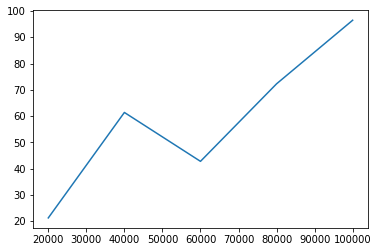

In [8]:
plt.plot(samples,r)

In [9]:
df = pd.read_csv('group14.csv',names=['Height','Weight','BMI','Shoulders','Arms'])
df = (df - df.mean() )/df.std()
samples = np.arange(20000,100000+1,20000)
k = 5
r = []
for i in range( len(samples) ):
    m = k_means( df.sample(samples[i]),k)
    print( m,"seconds")
    r.append(m)

15.931389093399048 seconds
26.09628653526306 seconds
77.35223317146301 seconds
82.04464626312256 seconds
151.45816946029663 seconds


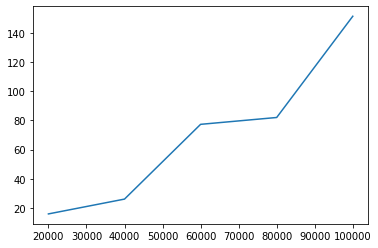

In [10]:
plt.plot(samples,r)

> ##### In 3 we are required to calculate the complexity from the code. And as we have nested loops it is o(N^2)

> #### From the time taken to samples size (Complexity) for both graphs cluster 3 , 5 are more likely to be linear O(N)
> #### It is not O(N^2) because the number as the number of iterations are not large compared to the size of the data set
> #### Also we can see ups and downs this is because the randomness of getting the first initial centroids if they are near to the centroids or not, and if we plot more samples it will be more likely to be a linear graph